Question 1
Area:  0.666583331691
Variance:  0.840405663533
Question 2
a) [[ 0.25  0.    0.    0.    0.    0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.    0.5   0.25  0.25]
 [ 0.    0.    0.5   0.    0.    0.  ]
 [ 0.    0.25  0.    0.    0.25  0.  ]
 [ 0.25  0.25  0.25  0.25  0.25  0.25]]
b) [ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
Transpose of the transition matrix is taken to calculate eigen vectors rather than left eigenvectors. As stationary distribution shows, it is not uniform distribution.
c) False
d) Tmix:  24
e)


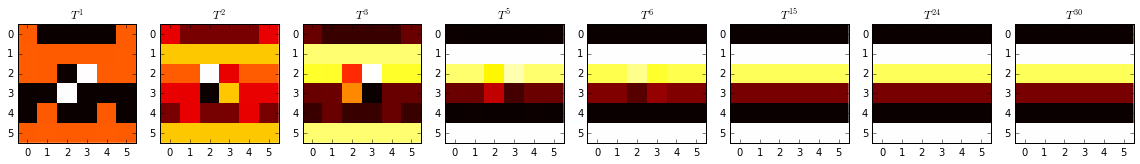

In [23]:
%matplotlib inline
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

#Question 1
print 'Question 1'
def getfx(x,p):
    return np.power(1-np.power(abs(x),p),1.0/p)

N = 1000
totalSum = 0
i = 0
samples = []
while i < N:
    x = np.random.exponential(scale=0.5, size=None)
    if x >= 0 and x <= 1:
        fx = getfx(x,0.5)
        px = 1 #uniform distribution
        gx = 2*np.exp(-2*x) # sample from exponential distribution
        totalSum += (fx*px)/gx
        samples.append(4*fx) # for the 4 side
    i += 1

print 'Area: ',(4*totalSum)/N
print 'Variance: ',np.var(samples)


#Question 2
print 'Question 2'
#a
t = np.array([[0.25, 0.25, 0.25, 0, 0, 0.25],
              [  0, 0.25,   0.25,   0, 0.25,   0.25],
              [  0,   0.25,   0, 0.5,   0,   0.25],
              [0, 0.25, 0.5,   0, 0, 0.25],
              [0, 0.25, 0.25, 0, 0.25, 0.25],
              [0.25,   0.25,   0.25,   0,   0, 0.25]])
T = t.T
print 'a)',T

#b
S,U = eig(T)
stationary = np.array(U[:,np.where(np.abs(S-1.) < 1e-8)[0][0]].flat)
stationary = (stationary / np.sum(stationary))

print 'b)',stationary

print 'Transpose of the transition matrix is taken to calculate eigen vectors rather than left eigenvectors. As stationary distribution shows, it is not uniform distribution.'

#c
print 'c)',np.allclose(np.dot(T,np.diag(stationary)),np.dot(T,np.diag(stationary)).T)

#d
eps = 1e-8
pi_0 = np.array([1,0,0,0,0,0])
pi_t = np.dot(T,pi_0)
Tmix = 1
while np.sum(np.abs(stationary-pi_t))/2 >= eps:
    pi_t = np.dot(T,pi_t)
    Tmix += 1
print 'd)','Tmix: ',Tmix

#e
powers = [1,2,3,5,6,15,24,30]
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(20,4))
i = 0
for power in powers:
    ax[i].imshow(np.linalg.matrix_power(T, power), cmap='hot', interpolation='none')
    ax[i].set_title("$T^{%d}$" % power)
    i += 1
print 'e)'
plt.show()